# Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load CSV

In [47]:
df = pd.read_csv('CovidDataAnalysis.csv')

# Check and Clean data

In [5]:
# Cheack if there is missing or null data
df.isnull().sum()

Date           0
State        181
Region         0
Confirmed      0
Deaths         0
Recovered      0
dtype: int64

In [20]:
# Fill missing data in State as 'Not Available'
df['State'] = df['State'].fillna('Not Available')
df.head(8)

,Date,State,Region,Confirmed,Deaths,Recovered
0,4/29/2020,Not Available,Afghanistan,1939,60,252
1,4/29/2020,Not Available,Albania,766,30,455
2,4/29/2020,Not Available,Algeria,3848,444,1702
3,4/29/2020,Not Available,Andorra,743,42,423
4,4/29/2020,Not Available,Angola,27,2,7
5,4/29/2020,Not Available,Antigua and Barbuda,24,3,11
6,4/29/2020,Not Available,Argentina,4285,214,1192
7,4/29/2020,Not Available,Armenia,1932,30,900


In [8]:
# Check csv - get rows and column count
df.shape

(321, 6)

In [10]:
# Check csv info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 321 entries, 0 to 320
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       321 non-null    object
 1   State      140 non-null    object
 2   Region     321 non-null    object
 3   Confirmed  321 non-null    int64 
 4   Deaths     321 non-null    int64 
 5   Recovered  321 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 15.2+ KB


In [11]:
df.describe()

,Confirmed,Deaths,Recovered
count,321.000000,321.000000,321.000000
mean,9949.800623,709.152648,3030.277259
std,31923.853086,3236.162817,14364.870365
min,0.000000,0.000000,0.000000
25%,104.000000,2.000000,2.000000
50%,653.000000,12.000000,73.000000
75%,4655.000000,144.000000,587.000000
max,299691.000000,27682.000000,132929.000000


In [22]:
df.count()

Date         321
State        321
Region       321
Confirmed    321
Deaths       321
Recovered    321
dtype: int64

# Since data is cleaned, Analyse and Visualize the data

In [31]:
# Check Covid confirmed/death/recovery stats
covid_confirmed = df['Confirmed'].sum()
covid_death = df['Deaths'].sum()
covid_recovered = df['Recovered'].sum()

print(f'Covid Confirmed : {covid_confirmed}')
print('-'*50)
print(f'Death due to Covid : {covid_death}')
print('-'*50)
print(f'Recovered from Covid : {covid_recovered}')

Covid Confirmed : 3193886
--------------------------------------------------
Death due to Covid : 227638
--------------------------------------------------
Recovered from Covid : 972719


<Axes: ylabel='Region'>

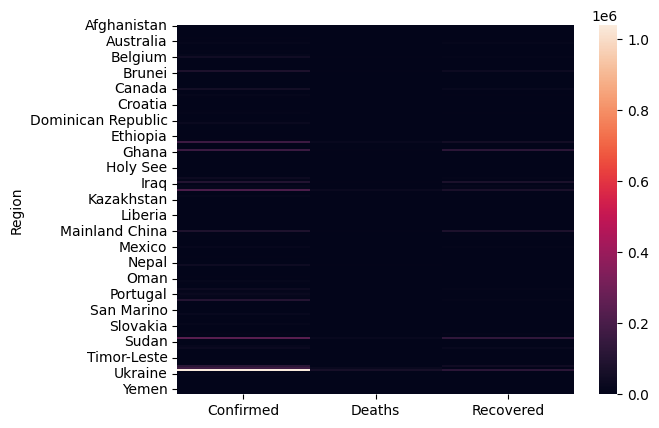

In [82]:
# Group by 'Region' and sum the data for 'Confirmed', 'Deaths', and 'Recovered'
region_data = df.groupby('Region')[['Confirmed', 'Deaths', 'Recovered']].sum()
sns.heatmap(region_data)

In [33]:
# Get stats on the basis every country and visualize top 10 affected countries for each case

In [56]:
# Exclude non-numeric columns
numeric_cols = df.select_dtypes(include='number').columns
country_base_data = df.groupby('Region')[numeric_cols].sum()
print(country_base_data)

                    Confirmed  Deaths  Recovered
Region                                          
Afghanistan              1939      60        252
Albania                   766      30        455
Algeria                  3848     444       1702
Andorra                   743      42        423
Angola                     27       2          7
...                       ...     ...        ...
West Bank and Gaza        344       2         71
Western Sahara              6       0          5
Yemen                       6       0          1
Zambia                     97       3         54
Zimbabwe                   32       4          5

[187 rows x 3 columns]


In [57]:
# Top 10 most confirmed regions -
confirmed_cases = country_base_data.Confirmed.sort_values(ascending=False).head(10)
print(confirmed_cases)
print('-'*50)
country_base_data.sort_values(by = ['Confirmed'], ascending=False)

Region
US                1039909
Spain              236899
Italy              203591
France             166543
UK                 166441
Germany            161539
Turkey             117589
Russia              99399
Iran                93657
Mainland China      82862
Name: Confirmed, dtype: int64
--------------------------------------------------


,Confirmed,Deaths,Recovered
Region,,,
US,1039909,60967,120720
Spain,236899,24275,132929
Italy,203591,27682,71252
France,166543,24121,49118
UK,166441,26166,857
...,...,...,...
Mauritania,8,1,6
Papua New Guinea,8,0,0
Bhutan,7,0,5


In [58]:
# Top 10 most death regions -
death_cases = country_base_data.Deaths.sort_values(ascending=False).head(10)
print(death_cases)
print('-'*50)
country_base_data.sort_values(by = ['Deaths'], ascending=False)

Region
US             60967
Italy          27682
UK             26166
Spain          24275
France         24121
Belgium         7501
Germany         6467
Iran            5957
Brazil          5513
Netherlands     4727
Name: Deaths, dtype: int64
--------------------------------------------------


,Confirmed,Deaths,Recovered
Region,,,
US,1039909,60967,120720
Italy,203591,27682,71252
UK,166441,26166,857
Spain,236899,24275,132929
France,166543,24121,49118
...,...,...,...
South Sudan,34,0,0
Uganda,81,0,52
Vietnam,270,0,222


In [59]:
# Top 10 most recovered regions -
recovered_cases = country_base_data.Recovered.sort_values(ascending=False).head(10)
print(recovered_cases)
print('-'*50)
country_base_data.sort_values(by = ['Recovered'], ascending=False)

Region
Spain             132929
US                120720
Germany           120400
Mainland China     77610
Iran               73791
Italy              71252
France             49118
Turkey             44040
Brazil             34132
Switzerland        22600
Name: Recovered, dtype: int64
--------------------------------------------------


,Confirmed,Deaths,Recovered
Region,,,
Spain,236899,24275,132929
US,1039909,60967,120720
Germany,161539,6467,120400
Mainland China,82862,4633,77610
Iran,93657,5957,73791
...,...,...,...
Holy See,10,0,2
Yemen,6,0,1
MS Zaandam,9,2,0
